import tensorflow as tf
from  tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [1]:
import tensorflow.keras as keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0,X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

2021-10-22 19:49:28.534250: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-22 19:49:28.534287: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300,activation="selu",kernel_initializer="lecun_normal",kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal",kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dense(10,activation="relu",kernel_initializer="he_normal"))
# model.summary()
model.add(keras.layers.Dense(10,activation="softmax"))
earlystop=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
checkp=keras.callbacks.ModelCheckpoint("mymodel.h5")

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [10]:
opter=keras.optimizers.SGD(clipvalue=100,lr=1e-4)
model.compile(loss="sparse_categorical_crossentropy",optimizer=opter,metrics="accuracy")

/home/ubuntu/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
history = model.fit(X_train, y_train, epochs=30,
 validation_data=(X_valid, y_valid),callbacks=[earlystop,checkp])

2021-10-22 20:06:33.456941: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 5.2800 - accuracy: 0.5694 - val_loss: 4.8597 - val_accuracy: 0.7064
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 4.7965 - accuracy: 0.7205 - val_loss: 4.6728 - val_accuracy: 0.7598
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 4.6697 - accuracy: 0.7505 - val_loss: 4.5785 - val_accuracy: 0.7800
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 4.5912 - accuracy: 0.7657 - val_loss: 4.5090 - val_accuracy: 0.7950
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 4.5269 - accuracy: 0.7795 - val_loss: 4.4535 - val_accuracy: 0.8012
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 4.4770 - accuracy: 0.7850 - val_loss: 4.4071 - val_accuracy: 0.8092
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 4.4330 - accuracy: 0.7903 - val_loss: 4.3643 - val_accuracy:

In [12]:
model.save("mymodel.h5")

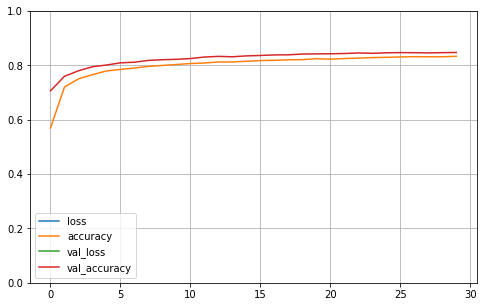

In [13]:
import pandas as pd      
import  matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 68.9467 - accuracy: 0.6058


[68.94670104980469, 0.6057999730110168]

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing= fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [28]:
model=keras.models.Sequential(
    [keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:])
    ,keras.layers.Dense(1)
    ]
)

model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=20)
mse_test=model.evaluate(X_test,y_test)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7898 - val_loss: 0.5676
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6984 - val_loss: 0.5243
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4913 - val_loss: 0.4852
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4654 - val_loss: 0.4647
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4506 - val_loss: 0.4552
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4389 - val_loss: 0.4582
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4325 - val_loss: 0.4502
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4295 - val_loss: 0.4326
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4207 - val_loss: 0.4275
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4205 - val_loss: 0.4300

In [29]:
input_a=keras.layers.Input(shape=[5],name="wide_input")
input_b=keras.layers.Input(shape=[6],name="deep_input")
hidden1=keras.layers.Dense(30,activation="relu")(input_b)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_a,hidden2])
output=keras.layers.Dense(1,name="output")(concat)
model=keras.Model(inputs=[input_a,input_b],outputs=[output])

In [30]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

/home/ubuntu/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.3496 - val_loss: 0.9528
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7722 - val_loss: 0.7248
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6693 - val_loss: 0.6666
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6260 - val_loss: 0.6305
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5970 - val_loss: 0.6044
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5753 - val_loss: 0.5833
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5581 - val_loss: 0.5702
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5442 - val_loss: 0.5565
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5341 - val_loss: 0.5496
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5254 - val_loss: 0.5400